🎉🎂🎉 Birthday Posts Exploration 
Motivation
It’s useful for a brand to know a beauty blogger’s birthday so that they can do timely birthday-specific outreach. For example, brands can engage some of their top bloggers with gift makeup sets. 

Project
-
We would like for you to visualize and explore our social media posts data, with a focus on the posts that mention the words “my birthday.” Here are some questions to guide your exploration. There is no need to answer all or any of these questions if you want to explore the data in another way. 
How many birthday posts does a user post on average? If a user posts multiple posts, are they all clustered around a certain month or day?
How are birthday mentions different across different channels?
How many birthday mentions indicate an age? (i.e. “my 30th birthday”)
Develop a way to guess a user’s birth date (month and/or day and/or year) using this text data.
What are some common themes in these birthday posts? (Are they about cake, gifts, resolutions, or something else?)
As you begin exploring the data, remember to record your thought process and show your work in some way (i.e. Jupyter notebook, d3.js, etc). 
Data
This csv file includes social media posts from our influencer database posted between Dec 2016 and Dec 2017. (~28 MB;  ~66k posts) Tip: use pandas to open this file in python.

In [83]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
import pprint
from wordcloud import WordCloud


In [7]:
posts = pd.read_csv("birthday_posts.csv")
# convert publish_date column to date time just in case
posts['publish_date'] = pd.to_datetime(posts['publish_date'])

In [22]:
#how many BIRTHDAY posts does a USER post on average ? this means ok how many unique users, and how  
# count user ids, take the mean of a column (doesnt really matter which one)

average_birthday_posts = posts.groupby('user_id').count()['text'].mean()
print("average birthday posts per user")
print(average_birthday_posts)

average birthday posts per user
1.8433724993808647


In [55]:
# birthday mentions by channels
# ok so i want number of unique users per channel? 
# facebook: X unique persons posts
# etc. etc. 

# posts['user_id'].unique()

posts_by_channel = posts.groupby('channel').count().reset_index().sort_values('publish_date', ascending = False)
# looks like instagram has the most birthday posts, followed by tiwtter etc etc.
# most unique users 
print("Number of posts by channel")
print(posts_by_channel)

print("Number of unique users per channel")
print(posts.groupby('channel')['user_id'].nunique())


"""TODO: plot out graphs"""

Number of posts by channel
                                             channel  user_id  publish_date  \
2                                          INSTAGRAM    35029         35029   
5                                            TWITTER    20433         20433   
1                                           FACEBOOK     6021          6021   
4                                          PINTEREST     3380          3380   
6                                            YOUTUBE     2127          2127   
0  Dm me if you want to negotiate. https://t.co/S...        0             0   
3                Need gin for my birthday tomorrow 😢        0             0   

   post_link   text  
2      35029  35029  
5      20433  20433  
1       6021   6021  
4       3380   3380  
6       2127   2127  
0          0      0  
3          0      0  
Number of unique users per channel
channel
Dm me if you want to negotiate. https://t.co/SYx4Eu…        0
FACEBOOK                                                 37

Develop a way to guess a user’s birth date (month and/or day and/or year) using this text data.

easy enough within a month, a user will likely not talk about the birthday unless its within a few weeks.. i hope
within a day - if a user posts multiple times, then the last post is likely the birthday or CLOSE to the birthday.
 
 so basically 1 - aggregate data per user id in some way.
  and then start reading the text and publish date.
  
  based on "data" guess the birthday
  
  so a user will have
  1- a list of publish dates
  each publish date will be paired w/ a text
  2- a list of texts
  3- a platform/channel that the post on
      - 
      
      so based on certain phrases, add (or possibly subtract) from the date.
      
      from there "make a prediction"... based on a list of dates that have been... modified? 
  
 strategy - for a user, apply function that analyzes data and returns a best guess
 
at each iteration 

    case 1 - date, nothing that i can take from the text
        if theres a later date, simply use the latest date and assume its the birthday post. 
        
    case 2 - date, something that might indicate a date (in X days .. etc) 
        ways to predict a date from text
        
        in X days <- how to parse this? 
    
    in [a-zA-Z\d]+ days   might need a numword dictionary to the the change. i should run this on data and see how many ppl mention.
    
    in [a-zA-Z\d]+ days
    
    **** UNTIL MY BIRTHDAY 
    since these posts all have my birthday, can look at the locality around the word birthday specifically also these ppl likely to be basic or sthn
    


In [58]:
# for user in users_birthday:
#     print(users_birthday[user])

In [85]:
# another playground for the birthday prediction
# so for each post a user has, create an update? 
"""
objective - predicting a user's birthday
input: pandas dataframe
output: a dictionary-  key: user_id, value: birthdate

# strategy -
    1 iterate thru list of unique users
        for all posts of a user:
            account for the post date column, and the text
            use the last date of a post as "initial guess"
            update initial guess based on "in x days" or in "in x weeks" etc. 
            
    base line birthday temporallocality - 
    based on last post's date.
"""
def analyze_pattern(date, pattern, text):
    
    #based on the data, it looks like most ppl only use actual words quite sparingly
    words_to_nums= {"one" : 1, "two" : 2, "three" : 3, "four" : 4, "five" : 5, 
                    "six" : 6, "seven" : 7, "eight" : 8, "nine" : 9, "ten" : 10,
                    "eleven": 11, "tweleve":12, "thirteen":13,"fourteen":14,"fifteen":15,
                    "sixteen":16, "seventeen":17, "eighteen":18, "nineteen":19,"twenty":20} 
    match = re.search(pattern,text)
    if match:
        match1 = match.group(1)
        match2 = match.group(2)
        parsed_match1 = False
        try:
            parsed_match1 = int(match1)
        except ValueError:
            pass
        if not parsed_match1:
            if match1 in words_to_nums:
                parsed_match1 = words_to_nums[match1]
        if "day" in match2:
            return date+datetime.timedelta(days=parsed_match1)
        elif "week" in match2:
            return date+datetime.timedelta(weeks=parsed_match1)
        elif "month" in match2:
            return date+relativedelta(months=+ parsed_match1)
    return False
        
def analyze_special_cases(date,text):
#     analyzed_data.extend(analyze_pattern(date, "birthday in a few day", text))
#     analyzed_data.extend(analyze_pattern(date, "birthday tomorrow", text))
#     analyzed_data.extend(analyze_pattern(date, "birthday in couple of days", text))
    match = re.search("birthday in a few ([a-zA-Z]+)", text)
    if match:
        if "day" in match.group(1):
            return (date+datetime.timedelta(days=3))
        if "week" in match.group(1):
            return (date+datetime.timedelta(weeks=3))
        if "month" in match.group(1):
            return date+relativedelta(months=+3)
    match = re.search("birthday tomorrow", text)
    if match:
        return (date+datetime.timedelta(days=1))
    match = re.search("birthday in a couple of ([a-zA-Z]+)", text)
    if match:
        if "day" in match.group(1):
            return (date+datetime.timedelta(days=2))
        if "week" in match.group(1):
            return (date+datetime.timedelta(weeks=2))
        if "month" in match.group(1):
            return date+relativedelta(months=+2)

def analyze_text(date, text): # returns a list of predicted birthdays based on text and publish date
    # iF TEXT MATCHES "NOT MY BIRTHDAY" - kill analyze text, return False
    #if a match is found, add the predicted birthday  
    not_bday_pattern = re.compile("(not my birthday)")
    if not_bday_pattern.match(text):
        return False
    
    """words_to_nums currently supports
        1-20
        i figure most posters would use the digits instead of typing out the actual word for the most part
    """ 
    analyzed_data = []
    #capture 'my birthday in one day' etc.
    dates = analyze_pattern(date, "birthday in ([a-zA-Z\d]+) ([a-zA-Z]+)", text)
    if dates:
        analyzed_data.append(dates)
    dates2 = analyze_special_cases(date, text)
    if dates2:
        analyzed_data.append(dates2)
    "Today is my birthday"
    return analyzed_data
    
    """
    TODO:
    "birthday next [a-zA-Z]"
    "birthday X Y ago"
    + other common phrases? other methods? 
    """

def predict_birthdays(users):
    user_bday_predictions = {}
    
    #iterate through each unique user
    for user in users:
        user_bday_predictions[user] = [] 
        user_posts = posts[posts['user_id']==user] #all post's by a specific user
        publish_date_guess = False # guess based on the last publish_date (assumed if a user posts multiple times, last one might be the bday)
        text_based_guess = False 
        for index, row in user_posts.iterrows():  
            date = row["publish_date"]
            text = row['text'].lower()
            if (publish_date_guess):
                if date > publish_date_guess: # set publish date_guess as the latest publish_date
                    publish_date_guess = date
            else:
                publish_date_guess = date
            text_based_guess = analyze_text(date, text) 
            if text_based_guess:
                user_bday_predictions[user] = text_based_guess
            else:
                user_bday_predictions[user] = publish_date_guess
        
    return user_bday_predictions
    
unique_users = posts['user_id'].unique()
predicted_user_birthdays = predict_birthdays(unique_users)
pprint.pprint(predicted_user_birthdays)

{nan: [],
 '09jojo09': Timestamp('2017-09-20 00:00:00'),
 '1000121677': Timestamp('2017-11-20 00:00:00'),
 '10003813': Timestamp('2017-07-30 00:00:00'),
 '100043805': Timestamp('2017-08-08 00:00:00'),
 '10007788': Timestamp('2017-08-21 00:00:00'),
 '100103130071228': Timestamp('2017-11-28 00:00:00'),
 '100108170049050': Timestamp('2017-01-14 00:00:00'),
 '100111923367055': Timestamp('2017-11-18 00:00:00'),
 '10011585': Timestamp('2017-06-16 00:00:00'),
 '1001441642': Timestamp('2017-09-20 00:00:00'),
 '1001514786541873': Timestamp('2017-03-14 00:00:00'),
 '1001543757': Timestamp('2017-08-23 00:00:00'),
 '100176406700598': Timestamp('2017-06-26 00:00:00'),
 '1001906197': Timestamp('2017-01-31 00:00:00'),
 '1001982635': Timestamp('2017-04-10 00:00:00'),
 '10022018': Timestamp('2017-07-16 00:00:00'),
 '100238724133': Timestamp('2017-05-17 00:00:00'),
 '100249743355066': Timestamp('2017-08-25 00:00:00'),
 '10025623': Timestamp('2016-12-17 00:00:00'),
 '10026': Timestamp('2017-03-25 00:00:0

 '1054620': Timestamp('2017-10-06 00:00:00'),
 '105464861702': Timestamp('2017-01-06 00:00:00'),
 '1054778362': Timestamp('2016-12-01 00:00:00'),
 '10550405': Timestamp('2017-04-14 00:00:00'),
 '10550441': Timestamp('2017-02-18 00:00:00'),
 '1055143812': Timestamp('2017-11-21 00:00:00'),
 '10551595': Timestamp('2017-10-08 00:00:00'),
 '10552166': Timestamp('2017-07-15 00:00:00'),
 '10554534': [Timestamp('2017-10-09 00:00:00')],
 '10555214': Timestamp('2017-10-16 00:00:00'),
 '1055571390': Timestamp('2017-04-04 00:00:00'),
 '1055580351': Timestamp('2017-06-02 00:00:00'),
 '10556155': Timestamp('2017-02-04 00:00:00'),
 '10556660': Timestamp('2017-03-07 00:00:00'),
 '105576781': Timestamp('2017-11-28 00:00:00'),
 '105578452853619': Timestamp('2017-02-23 00:00:00'),
 '1055851591104219': Timestamp('2017-06-28 00:00:00'),
 '105595093': Timestamp('2017-01-06 00:00:00'),
 '105597862': Timestamp('2017-05-20 00:00:00'),
 '10560615': Timestamp('2017-09-21 00:00:00'),
 '10560805': Timestamp('2017-

 '11591975': Timestamp('2016-12-12 00:00:00'),
 '1159423014': Timestamp('2017-05-31 00:00:00'),
 '11594376': Timestamp('2017-08-02 00:00:00'),
 '115960671': Timestamp('2017-05-21 00:00:00'),
 '1159621989': Timestamp('2017-08-23 00:00:00'),
 '115967655229027': Timestamp('2017-11-04 00:00:00'),
 '11597178': Timestamp('2017-08-06 00:00:00'),
 '115972568529638': [Timestamp('2017-05-06 00:00:00')],
 '115974078413847': Timestamp('2017-09-03 00:00:00'),
 '1159763': Timestamp('2017-07-21 00:00:00'),
 '11597722': Timestamp('2017-10-12 00:00:00'),
 '115980612': Timestamp('2016-12-15 00:00:00'),
 '1159828095': Timestamp('2017-08-26 00:00:00'),
 '1159948862': Timestamp('2017-01-12 00:00:00'),
 '11600284': Timestamp('2017-02-21 00:00:00'),
 '116015067': Timestamp('2017-08-18 00:00:00'),
 '1160535456': Timestamp('2017-03-08 00:00:00'),
 '1160536770708823': Timestamp('2017-04-21 00:00:00'),
 '1160778762': Timestamp('2017-03-09 00:00:00'),
 '11608087': Timestamp('2017-10-04 00:00:00'),
 '1160999917': 

 '1263507280': Timestamp('2017-09-14 00:00:00'),
 '126354187462961': Timestamp('2017-07-31 00:00:00'),
 '126408377426346': Timestamp('2017-03-08 00:00:00'),
 '12641219': Timestamp('2017-07-01 00:00:00'),
 '1264235816': Timestamp('2017-01-27 00:00:00'),
 '126453604083110': Timestamp('2017-09-22 00:00:00'),
 '1264618987': Timestamp('2017-02-17 00:00:00'),
 '126492170216': Timestamp('2017-08-06 00:00:00'),
 '12649372': Timestamp('2016-12-15 00:00:00'),
 '1264977205': Timestamp('2017-11-03 00:00:00'),
 '1265038927': Timestamp('2017-03-16 00:00:00'),
 '126504734': Timestamp('2017-10-17 00:00:00'),
 '126520047402541': Timestamp('2017-03-03 00:00:00'),
 '1265313422': Timestamp('2017-03-29 00:00:00'),
 '1265431287': Timestamp('2017-10-28 00:00:00'),
 '12654563': Timestamp('2017-05-05 00:00:00'),
 '12656221': Timestamp('2017-11-18 00:00:00'),
 '1265749771': Timestamp('2017-03-12 00:00:00'),
 '1265806513': Timestamp('2017-10-02 00:00:00'),
 '126585190842504': Timestamp('2017-03-24 00:00:00'),
 '

 '13682025': Timestamp('2017-06-19 00:00:00'),
 '1368324537': Timestamp('2017-02-07 00:00:00'),
 '13684133': Timestamp('2017-08-23 00:00:00'),
 '13684838': Timestamp('2017-08-11 00:00:00'),
 '1368590701': Timestamp('2017-01-23 00:00:00'),
 '1368675839': Timestamp('2017-05-16 00:00:00'),
 '1368693497': Timestamp('2017-11-15 00:00:00'),
 '1368848268': Timestamp('2017-05-01 00:00:00'),
 '1368876551': Timestamp('2017-02-02 00:00:00'),
 '13689110': Timestamp('2017-07-03 00:00:00'),
 '1369009062': Timestamp('2017-03-01 00:00:00'),
 '1369015698': Timestamp('2017-01-12 00:00:00'),
 '1369184761': Timestamp('2017-11-16 00:00:00'),
 '13692205': Timestamp('2017-06-27 00:00:00'),
 '13692210': Timestamp('2017-01-31 00:00:00'),
 '1369254749': Timestamp('2017-08-23 00:00:00'),
 '1369260414': Timestamp('2017-04-08 00:00:00'),
 '1369470076': Timestamp('2017-09-11 00:00:00'),
 '136981211': Timestamp('2017-10-27 00:00:00'),
 '137015663094790': Timestamp('2017-10-18 00:00:00'),
 '1370255253': Timestamp('20

 '143973888': Timestamp('2017-09-25 00:00:00'),
 '1439869896': Timestamp('2017-03-29 00:00:00'),
 '1439873448': Timestamp('2017-01-21 00:00:00'),
 '14398838': [Timestamp('2016-12-30 00:00:00')],
 '143989048': Timestamp('2016-12-20 00:00:00'),
 '143999512': Timestamp('2016-12-09 00:00:00'),
 '1440030861': Timestamp('2017-05-19 00:00:00'),
 '144041425651053': Timestamp('2017-06-13 00:00:00'),
 '1440440732': Timestamp('2017-11-11 00:00:00'),
 '1440464': Timestamp('2017-10-21 00:00:00'),
 '1440475139': Timestamp('2017-09-16 00:00:00'),
 '1440514171': Timestamp('2017-06-19 00:00:00'),
 '1440526810': Timestamp('2017-05-30 00:00:00'),
 '1440555786': Timestamp('2017-01-31 00:00:00'),
 '14405571': Timestamp('2016-12-23 00:00:00'),
 '144056540730': Timestamp('2017-10-24 00:00:00'),
 '144056667': Timestamp('2017-10-17 00:00:00'),
 '1440631083': Timestamp('2016-12-15 00:00:00'),
 '144068773': Timestamp('2017-11-17 00:00:00'),
 '144071124': Timestamp('2017-09-15 00:00:00'),
 '144085255': Timestamp(

 '1499580630332154': Timestamp('2017-04-11 00:00:00'),
 '149960495143086': Timestamp('2017-06-07 00:00:00'),
 '14996270': Timestamp('2017-11-20 00:00:00'),
 '1499645988': Timestamp('2017-11-27 00:00:00'),
 '1499655225': Timestamp('2017-10-20 00:00:00'),
 '1499849860256599': Timestamp('2017-08-15 00:00:00'),
 '1499890265': Timestamp('2017-01-10 00:00:00'),
 '1499910': Timestamp('2017-04-21 00:00:00'),
 '1500044479': Timestamp('2017-07-06 00:00:00'),
 '1500109783': Timestamp('2017-08-29 00:00:00'),
 '150018058360942': Timestamp('2017-07-31 00:00:00'),
 '1500223786863904': Timestamp('2017-08-30 00:00:00'),
 '15002378': Timestamp('2017-09-04 00:00:00'),
 '1500344371': Timestamp('2017-10-06 00:00:00'),
 '1500350880': Timestamp('2017-11-15 00:00:00'),
 '1500365717': Timestamp('2017-08-17 00:00:00'),
 '1500425284': Timestamp('2017-11-26 00:00:00'),
 '1500462954': Timestamp('2017-11-03 00:00:00'),
 '1500503': Timestamp('2017-07-01 00:00:00'),
 '1500530209': Timestamp('2017-07-20 00:00:00'),
 '

 '1557531500': Timestamp('2017-06-08 00:00:00'),
 '15575630': Timestamp('2017-02-06 00:00:00'),
 '1557739771211915': Timestamp('2017-06-21 00:00:00'),
 '1557758271149067': Timestamp('2017-10-12 00:00:00'),
 '15580181': Timestamp('2017-11-26 00:00:00'),
 '1558213163': Timestamp('2017-04-17 00:00:00'),
 '15583065': Timestamp('2017-08-02 00:00:00'),
 '1558307578': Timestamp('2017-08-10 00:00:00'),
 '15584875': Timestamp('2017-06-03 00:00:00'),
 '1558523777': Timestamp('2017-09-09 00:00:00'),
 '15585410': Timestamp('2017-11-20 00:00:00'),
 '15585448': Timestamp('2017-02-08 00:00:00'),
 '1558672740': Timestamp('2016-12-11 00:00:00'),
 '15588029': Timestamp('2016-12-13 00:00:00'),
 '15588222': Timestamp('2017-03-04 00:00:00'),
 '15588833': Timestamp('2017-06-23 00:00:00'),
 '1558924495': Timestamp('2017-10-02 00:00:00'),
 '15589655521': Timestamp('2017-04-05 00:00:00'),
 '1558980577': Timestamp('2017-01-07 00:00:00'),
 '1559015950': Timestamp('2017-01-16 00:00:00'),
 '1559184787': Timestamp(

 '1645666807': Timestamp('2017-08-20 00:00:00'),
 '16457983': Timestamp('2017-03-24 00:00:00'),
 '1645811371': Timestamp('2017-03-30 00:00:00'),
 '16458118': Timestamp('2017-08-18 00:00:00'),
 '1645857343': Timestamp('2017-01-16 00:00:00'),
 '164596083099': Timestamp('2017-09-22 00:00:00'),
 '1646229974': Timestamp('2017-06-24 00:00:00'),
 '1646278769': Timestamp('2017-06-04 00:00:00'),
 '164637686901120': Timestamp('2017-06-07 00:00:00'),
 '16464248': Timestamp('2017-03-26 00:00:00'),
 '16465079': Timestamp('2017-11-21 00:00:00'),
 '16465544': Timestamp('2017-05-16 00:00:00'),
 '1646562959': Timestamp('2016-12-17 00:00:00'),
 '1646567968': Timestamp('2017-07-01 00:00:00'),
 '16466396': Timestamp('2017-03-23 00:00:00'),
 '16467148': Timestamp('2017-11-18 00:00:00'),
 '16467410': Timestamp('2017-10-24 00:00:00'),
 '16468763': Timestamp('2017-06-09 00:00:00'),
 '1647047252': Timestamp('2017-10-23 00:00:00'),
 '16470674': Timestamp('2017-06-22 00:00:00'),
 '16471088': Timestamp('2017-09-2

 '173691913': Timestamp('2017-07-01 00:00:00'),
 '173694109': Timestamp('2017-08-25 00:00:00'),
 '173695638': Timestamp('2017-07-14 00:00:00'),
 '1737008511': Timestamp('2017-10-14 00:00:00'),
 '173720006018507': Timestamp('2017-02-11 00:00:00'),
 '1737215': Timestamp('2016-12-08 00:00:00'),
 '173726816': Timestamp('2017-01-14 00:00:00'),
 '17374325': Timestamp('2016-12-27 00:00:00'),
 '17374477': Timestamp('2017-04-13 00:00:00'),
 '17375180': Timestamp('2017-07-25 00:00:00'),
 '1737614048': Timestamp('2017-06-01 00:00:00'),
 '1737629465': Timestamp('2017-06-18 00:00:00'),
 '17376342': Timestamp('2017-05-24 00:00:00'),
 '17376658': Timestamp('2017-10-30 00:00:00'),
 '1737780': Timestamp('2017-10-07 00:00:00'),
 '1737846193106221': Timestamp('2016-12-15 00:00:00'),
 '173789509': Timestamp('2017-08-09 00:00:00'),
 '1737911520': Timestamp('2017-08-14 00:00:00'),
 '173796044': Timestamp('2017-07-16 00:00:00'),
 '173800008': Timestamp('2017-10-06 00:00:00'),
 '173808605': Timestamp('2017-01

 '18041370': Timestamp('2017-03-01 00:00:00'),
 '180418482001802': Timestamp('2017-01-19 00:00:00'),
 '180425297': Timestamp('2017-05-17 00:00:00'),
 '180427129': Timestamp('2017-02-20 00:00:00'),
 '180443770': Timestamp('2017-09-11 00:00:00'),
 '18047701': Timestamp('2017-04-05 00:00:00'),
 '18047810': Timestamp('2017-08-20 00:00:00'),
 '1804889037': Timestamp('2017-08-30 00:00:00'),
 '180494482056116': Timestamp('2017-05-23 00:00:00'),
 '180504851': Timestamp('2016-12-18 00:00:00'),
 '180513208': Timestamp('2016-12-31 00:00:00'),
 '1805216013': Timestamp('2017-09-14 00:00:00'),
 '180523346': Timestamp('2017-07-16 00:00:00'),
 '1805240404': Timestamp('2017-03-30 00:00:00'),
 '180545568': Timestamp('2017-07-23 00:00:00'),
 '18055540': Timestamp('2017-04-21 00:00:00'),
 '180558369': Timestamp('2017-08-11 00:00:00'),
 '180564018': Timestamp('2016-12-25 00:00:00'),
 '1805688814': Timestamp('2017-04-12 00:00:00'),
 '18056956': Timestamp('2017-04-30 00:00:00'),
 '18057197': Timestamp('2017-

 '186830385': Timestamp('2017-09-08 00:00:00'),
 '186834318055307': Timestamp('2016-12-08 00:00:00'),
 '186834362': Timestamp('2017-01-26 00:00:00'),
 '186847106': Timestamp('2017-11-09 00:00:00'),
 '186848955': Timestamp('2017-10-03 00:00:00'),
 '186849169': Timestamp('2017-09-15 00:00:00'),
 '18685377': Timestamp('2017-09-29 00:00:00'),
 '18687143': Timestamp('2017-10-20 00:00:00'),
 '18687296': Timestamp('2017-08-26 00:00:00'),
 '186886881': Timestamp('2017-10-01 00:00:00'),
 '186929250': Timestamp('2017-03-13 00:00:00'),
 '18693638': Timestamp('2017-01-10 00:00:00'),
 '186948633': Timestamp('2017-10-20 00:00:00'),
 '1869501871': Timestamp('2017-06-21 00:00:00'),
 '18695081': Timestamp('2017-09-09 00:00:00'),
 '18696167': Timestamp('2017-10-24 00:00:00'),
 '18697659': Timestamp('2017-10-10 00:00:00'),
 '186978677': Timestamp('2016-12-03 00:00:00'),
 '186984348': Timestamp('2017-04-13 00:00:00'),
 '1870385': Timestamp('2017-02-04 00:00:00'),
 '187046801': Timestamp('2017-08-01 00:00:

 '19376969': Timestamp('2017-09-08 00:00:00'),
 '193769909': Timestamp('2017-09-18 00:00:00'),
 '193782646': Timestamp('2017-08-25 00:00:00'),
 '19378269': Timestamp('2017-07-27 00:00:00'),
 '193789494': Timestamp('2016-12-07 00:00:00'),
 '1937929556': Timestamp('2017-05-09 00:00:00'),
 '193807348': Timestamp('2017-09-10 00:00:00'),
 '19382116': Timestamp('2017-04-27 00:00:00'),
 '19382256': Timestamp('2017-03-27 00:00:00'),
 '193827167': Timestamp('2017-09-21 00:00:00'),
 '19382988': Timestamp('2017-02-06 00:00:00'),
 '193832035': Timestamp('2017-04-04 00:00:00'),
 '193832957306921': Timestamp('2017-07-01 00:00:00'),
 '19383409': Timestamp('2017-06-26 00:00:00'),
 '19385404': Timestamp('2017-07-25 00:00:00'),
 '193860446': Timestamp('2017-02-19 00:00:00'),
 '19386175': Timestamp('2017-05-28 00:00:00'),
 '1938663148': Timestamp('2017-09-01 00:00:00'),
 '193873343': Timestamp('2017-01-06 00:00:00'),
 '1938806': Timestamp('2017-05-12 00:00:00'),
 '1938814427': Timestamp('2017-04-08 00:00

 '19987834992': Timestamp('2017-09-29 00:00:00'),
 '19990983': Timestamp('2017-11-08 00:00:00'),
 '199932372': Timestamp('2017-05-22 00:00:00'),
 '1999384': Timestamp('2017-08-19 00:00:00'),
 '1999452771': Timestamp('2017-04-23 00:00:00'),
 '199949076684614': Timestamp('2017-02-25 00:00:00'),
 '1999567075': Timestamp('2016-12-14 00:00:00'),
 '19996315': Timestamp('2017-10-10 00:00:00'),
 '19996631': Timestamp('2017-11-05 00:00:00'),
 '199972046713272': Timestamp('2017-08-08 00:00:00'),
 '199975812': Timestamp('2017-02-17 00:00:00'),
 '1999840941': Timestamp('2017-04-26 00:00:00'),
 '1999863421': Timestamp('2017-02-12 00:00:00'),
 '199987613': Timestamp('2017-06-21 00:00:00'),
 '20001887': Timestamp('2017-04-27 00:00:00'),
 '2000303634': Timestamp('2017-07-10 00:00:00'),
 '20003448': Timestamp('2017-11-08 00:00:00'),
 '20004575': Timestamp('2017-08-29 00:00:00'),
 '200049103': Timestamp('2017-08-18 00:00:00'),
 '2000520': Timestamp('2017-05-09 00:00:00'),
 '200052876': Timestamp('2017-0

 '2075640191': Timestamp('2017-11-23 00:00:00'),
 '207578045': Timestamp('2017-08-04 00:00:00'),
 '207596329338739': Timestamp('2017-03-10 00:00:00'),
 '207599': Timestamp('2017-08-12 00:00:00'),
 '207602680': Timestamp('2017-04-30 00:00:00'),
 '2076048': Timestamp('2017-08-21 00:00:00'),
 '207617825958473': Timestamp('2017-07-25 00:00:00'),
 '207622503': Timestamp('2017-09-15 00:00:00'),
 '2076336315': Timestamp('2017-01-06 00:00:00'),
 '2076470120': Timestamp('2017-06-04 00:00:00'),
 '207651280': Timestamp('2017-10-01 00:00:00'),
 '2076555453': Timestamp('2017-09-21 00:00:00'),
 '2076576': Timestamp('2017-06-20 00:00:00'),
 '207657654': Timestamp('2017-07-25 00:00:00'),
 '2076694816': Timestamp('2017-05-27 00:00:00'),
 '2076713': Timestamp('2017-04-04 00:00:00'),
 '207672722': Timestamp('2017-04-17 00:00:00'),
 '20768446': Timestamp('2017-08-14 00:00:00'),
 '207688631': Timestamp('2017-10-14 00:00:00'),
 '2076898': Timestamp('2017-08-06 00:00:00'),
 '20768980': Timestamp('2017-02-27 

 '215595597': Timestamp('2017-11-13 00:00:00'),
 '21559963': Timestamp('2017-03-06 00:00:00'),
 '215599945220481': Timestamp('2017-11-01 00:00:00'),
 '2156003702': [Timestamp('2017-04-09 00:00:00')],
 '215620129': Timestamp('2017-03-25 00:00:00'),
 '215624650': Timestamp('2017-07-30 00:00:00'),
 '2156289625': Timestamp('2017-09-30 00:00:00'),
 '21562899': Timestamp('2016-12-18 00:00:00'),
 '215630988': Timestamp('2017-02-02 00:00:00'),
 '2156614190': Timestamp('2017-02-12 00:00:00'),
 '215665936': Timestamp('2017-10-12 00:00:00'),
 '215683237': Timestamp('2017-09-23 00:00:00'),
 '215706556': Timestamp('2017-09-22 00:00:00'),
 '215706982': Timestamp('2017-02-13 00:00:00'),
 '21571035': Timestamp('2017-04-02 00:00:00'),
 '2157124520': Timestamp('2017-05-28 00:00:00'),
 '21571340': Timestamp('2017-01-12 00:00:00'),
 '21574303': Timestamp('2017-08-01 00:00:00'),
 '215755367': Timestamp('2017-05-21 00:00:00'),
 '21576419': Timestamp('2016-12-01 00:00:00'),
 '2157651': Timestamp('2017-04-13 

 '222645578': Timestamp('2017-11-22 00:00:00'),
 '222652435': Timestamp('2017-09-20 00:00:00'),
 '22265768': Timestamp('2017-01-08 00:00:00'),
 '2226726': Timestamp('2017-05-02 00:00:00'),
 '222676440': Timestamp('2017-01-14 00:00:00'),
 '222683494': Timestamp('2016-12-18 00:00:00'),
 '22269112': Timestamp('2017-05-01 00:00:00'),
 '222691407': Timestamp('2017-10-04 00:00:00'),
 '222691723': Timestamp('2017-11-28 00:00:00'),
 '222694919': Timestamp('2017-08-10 00:00:00'),
 '2227037': Timestamp('2017-02-07 00:00:00'),
 '22271450': Timestamp('2017-10-16 00:00:00'),
 '222719034': Timestamp('2016-12-25 00:00:00'),
 '222719171': Timestamp('2017-04-12 00:00:00'),
 '222719877817246': Timestamp('2017-11-02 00:00:00'),
 '222720956': Timestamp('2017-06-09 00:00:00'),
 '222727547753926': Timestamp('2017-02-01 00:00:00'),
 '222733161': Timestamp('2017-08-19 00:00:00'),
 '2227438591': Timestamp('2017-08-04 00:00:00'),
 '2227463461': Timestamp('2017-05-27 00:00:00'),
 '22279212': Timestamp('2017-04-3

 '229375833772279': Timestamp('2017-04-06 00:00:00'),
 '22940719': Timestamp('2017-10-03 00:00:00'),
 '229408445': Timestamp('2017-04-12 00:00:00'),
 '2294125': Timestamp('2017-02-07 00:00:00'),
 '22941402': Timestamp('2017-07-08 00:00:00'),
 '2294233646': Timestamp('2017-03-06 00:00:00'),
 '2294255671': Timestamp('2016-12-29 00:00:00'),
 '22944766': Timestamp('2017-09-18 00:00:00'),
 '229454851': Timestamp('2017-04-19 00:00:00'),
 '229479412': Timestamp('2017-05-28 00:00:00'),
 '2294996': Timestamp('2017-01-29 00:00:00'),
 '229503701': Timestamp('2017-01-29 00:00:00'),
 '229519719': Timestamp('2017-09-12 00:00:00'),
 '22954290': [Timestamp('2017-04-11 00:00:00')],
 '229569758': Timestamp('2017-11-01 00:00:00'),
 '2295857929': Timestamp('2017-10-18 00:00:00'),
 '22959298': [Timestamp('2017-02-18 00:00:00')],
 '229599354': Timestamp('2017-10-26 00:00:00'),
 '22961505': Timestamp('2017-01-09 00:00:00'),
 '22963288': Timestamp('2016-12-10 00:00:00'),
 '22963606': Timestamp('2017-06-24 00:

 '23855393': Timestamp('2017-08-01 00:00:00'),
 '2385663072': Timestamp('2017-08-06 00:00:00'),
 '23858681': Timestamp('2017-03-16 00:00:00'),
 '23858892707': Timestamp('2017-02-06 00:00:00'),
 '238602902': Timestamp('2017-09-01 00:00:00'),
 '23860363': Timestamp('2017-05-12 00:00:00'),
 '2386138372': Timestamp('2017-08-02 00:00:00'),
 '238621716': Timestamp('2017-03-04 00:00:00'),
 '238630817': Timestamp('2017-05-02 00:00:00'),
 '238633597': Timestamp('2017-08-09 00:00:00'),
 '238640508': Timestamp('2017-09-29 00:00:00'),
 '238651447': Timestamp('2017-05-27 00:00:00'),
 '238662233': Timestamp('2017-04-13 00:00:00'),
 '238664912': Timestamp('2017-08-27 00:00:00'),
 '238667569': Timestamp('2017-04-29 00:00:00'),
 '2386698': Timestamp('2017-09-10 00:00:00'),
 '238682748': Timestamp('2017-09-02 00:00:00'),
 '23870099': Timestamp('2017-09-23 00:00:00'),
 '238715116': Timestamp('2017-09-26 00:00:00'),
 '23871778': Timestamp('2017-10-25 00:00:00'),
 '23871958': Timestamp('2017-11-17 00:00:00

 '2475763975': Timestamp('2017-11-22 00:00:00'),
 '24761940': Timestamp('2017-02-01 00:00:00'),
 '247622680': Timestamp('2017-11-09 00:00:00'),
 '2476281037': Timestamp('2017-02-03 00:00:00'),
 '2476298125': [Timestamp('2017-07-25 00:00:00')],
 '247637509': Timestamp('2017-10-16 00:00:00'),
 '247640028': Timestamp('2017-08-15 00:00:00'),
 '247647370': Timestamp('2017-07-03 00:00:00'),
 '2476638583': Timestamp('2017-03-05 00:00:00'),
 '24767559': Timestamp('2017-07-10 00:00:00'),
 '24769725': Timestamp('2017-10-16 00:00:00'),
 '24773023': Timestamp('2017-05-18 00:00:00'),
 '2477540041': Timestamp('2017-04-24 00:00:00'),
 '247784897': Timestamp('2017-11-06 00:00:00'),
 '247787578670892': Timestamp('2017-08-09 00:00:00'),
 '247825024': Timestamp('2017-11-21 00:00:00'),
 '247827334': Timestamp('2017-07-21 00:00:00'),
 '24784062': Timestamp('2017-03-01 00:00:00'),
 '24786344': Timestamp('2017-08-04 00:00:00'),
 '24786692848': Timestamp('2017-10-15 00:00:00'),
 '247876010': Timestamp('2017-0

 '257677255': Timestamp('2017-08-10 00:00:00'),
 '2576793546': Timestamp('2017-11-30 00:00:00'),
 '257696364': Timestamp('2017-03-04 00:00:00'),
 '257698939': Timestamp('2017-01-03 00:00:00'),
 '257710321': Timestamp('2017-03-31 00:00:00'),
 '257732526': Timestamp('2017-03-06 00:00:00'),
 '257735549': Timestamp('2017-03-26 00:00:00'),
 '25775613': Timestamp('2016-12-29 00:00:00'),
 '25777189': Timestamp('2017-11-20 00:00:00'),
 '257798124': Timestamp('2017-09-05 00:00:00'),
 '25781890': Timestamp('2017-07-26 00:00:00'),
 '25787009': Timestamp('2017-03-03 00:00:00'),
 '257872905': Timestamp('2016-12-20 00:00:00'),
 '2578732832': Timestamp('2017-10-26 00:00:00'),
 '257882959': Timestamp('2017-03-02 00:00:00'),
 '257887013': Timestamp('2017-04-25 00:00:00'),
 '25791636': Timestamp('2016-12-08 00:00:00'),
 '257947903': Timestamp('2017-10-19 00:00:00'),
 '2579525650': Timestamp('2017-06-23 00:00:00'),
 '257968200902758': Timestamp('2017-02-08 00:00:00'),
 '25797836': Timestamp('2017-05-16 0

 '26753611': Timestamp('2017-02-09 00:00:00'),
 '267536651': Timestamp('2017-05-24 00:00:00'),
 '267544183415225': Timestamp('2017-03-18 00:00:00'),
 '267591640': Timestamp('2017-07-14 00:00:00'),
 '267600177': Timestamp('2017-09-15 00:00:00'),
 '267606990': Timestamp('2017-01-26 00:00:00'),
 '26762428': Timestamp('2017-01-17 00:00:00'),
 '267624344': Timestamp('2017-06-03 00:00:00'),
 '267635200': Timestamp('2017-04-15 00:00:00'),
 '267654179': Timestamp('2017-09-01 00:00:00'),
 '26767351': Timestamp('2017-02-28 00:00:00'),
 '267676': [Timestamp('2017-08-31 00:00:00')],
 '2676799726': Timestamp('2017-09-06 00:00:00'),
 '267692864': Timestamp('2017-01-13 00:00:00'),
 '26769457': Timestamp('2017-02-11 00:00:00'),
 '267711515': Timestamp('2017-09-17 00:00:00'),
 '26773096': Timestamp('2017-10-17 00:00:00'),
 '267743553': Timestamp('2017-05-09 00:00:00'),
 '26774593': Timestamp('2017-07-15 00:00:00'),
 '267758713': Timestamp('2017-10-16 00:00:00'),
 '26776072': Timestamp('2017-09-15 00:00

 '2785350': Timestamp('2017-06-19 00:00:00'),
 '278547178': Timestamp('2017-11-04 00:00:00'),
 '27855477': Timestamp('2017-03-01 00:00:00'),
 '278575175': Timestamp('2017-08-05 00:00:00'),
 '278585559': Timestamp('2017-04-06 00:00:00'),
 '2786024': Timestamp('2017-11-03 00:00:00'),
 '278606754': Timestamp('2017-07-26 00:00:00'),
 '2786106240': Timestamp('2017-01-10 00:00:00'),
 '278632991': Timestamp('2017-04-27 00:00:00'),
 '27864697': Timestamp('2017-05-21 00:00:00'),
 '27865919571': Timestamp('2017-05-22 00:00:00'),
 '278674896': Timestamp('2017-11-13 00:00:00'),
 '27867814': Timestamp('2017-11-05 00:00:00'),
 '278682611': Timestamp('2017-08-23 00:00:00'),
 '2786901137': Timestamp('2017-02-18 00:00:00'),
 '27872575': Timestamp('2017-07-02 00:00:00'),
 '27873266': Timestamp('2017-06-29 00:00:00'),
 '27875566': Timestamp('2017-09-12 00:00:00'),
 '278763105530890': Timestamp('2017-07-09 00:00:00'),
 '278799746': Timestamp('2017-11-06 00:00:00'),
 '278805451': Timestamp('2017-09-26 00:0

 '29031199': Timestamp('2017-07-06 00:00:00'),
 '29031245': Timestamp('2017-11-20 00:00:00'),
 '290312806': Timestamp('2017-09-11 00:00:00'),
 '29031281': Timestamp('2017-03-31 00:00:00'),
 '290342134': Timestamp('2017-02-26 00:00:00'),
 '29036048': Timestamp('2017-04-28 00:00:00'),
 '290363701098591': Timestamp('2017-01-07 00:00:00'),
 '2903655047': Timestamp('2017-05-15 00:00:00'),
 '29037839': Timestamp('2017-09-22 00:00:00'),
 '290392029': Timestamp('2017-06-18 00:00:00'),
 '2904048983': Timestamp('2017-10-19 00:00:00'),
 '290412776': Timestamp('2017-04-25 00:00:00'),
 '2904433': Timestamp('2017-05-30 00:00:00'),
 '290452426': Timestamp('2017-06-26 00:00:00'),
 '290452856': Timestamp('2017-03-05 00:00:00'),
 '2904658727': Timestamp('2017-07-13 00:00:00'),
 '2904888233': Timestamp('2017-08-16 00:00:00'),
 '290506686': Timestamp('2017-06-07 00:00:00'),
 '290515858': Timestamp('2017-07-01 00:00:00'),
 '290520056': Timestamp('2017-08-27 00:00:00'),
 '2905249763': Timestamp('2017-11-02 

 '30384002': Timestamp('2016-12-28 00:00:00'),
 '303882236': Timestamp('2017-11-13 00:00:00'),
 '303895313': Timestamp('2017-08-15 00:00:00'),
 '3039188227': Timestamp('2017-07-02 00:00:00'),
 '303923281': Timestamp('2016-12-27 00:00:00'),
 '303925162': Timestamp('2017-04-10 00:00:00'),
 '30393979': Timestamp('2017-01-14 00:00:00'),
 '303962708': Timestamp('2016-12-07 00:00:00'),
 '303969136': Timestamp('2017-04-28 00:00:00'),
 '303994622954604': Timestamp('2017-03-26 00:00:00'),
 '3040078314': Timestamp('2017-07-03 00:00:00'),
 '304009553093639': Timestamp('2017-03-15 00:00:00'),
 '3040118821': Timestamp('2017-04-20 00:00:00'),
 '304015742949745': Timestamp('2016-12-17 00:00:00'),
 '3040250': Timestamp('2017-09-25 00:00:00'),
 '30404887': Timestamp('2017-10-01 00:00:00'),
 '30406477': Timestamp('2017-03-22 00:00:00'),
 '304088059': Timestamp('2016-12-03 00:00:00'),
 '3041097': Timestamp('2017-09-29 00:00:00'),
 '3041129661': Timestamp('2017-11-09 00:00:00'),
 '3041173947': Timestamp('

 '3169053693': Timestamp('2017-10-14 00:00:00'),
 '316927528': Timestamp('2017-07-30 00:00:00'),
 '3169297994': Timestamp('2017-07-04 00:00:00'),
 '3169401233': Timestamp('2017-06-05 00:00:00'),
 '31694065': Timestamp('2017-02-14 00:00:00'),
 '31695803': Timestamp('2017-05-04 00:00:00'),
 '316989595': Timestamp('2017-01-11 00:00:00'),
 '31699371': Timestamp('2017-01-16 00:00:00'),
 '31699527': Timestamp('2017-03-23 00:00:00'),
 '317053573': Timestamp('2017-09-08 00:00:00'),
 '317102436': Timestamp('2017-03-31 00:00:00'),
 '3171067': Timestamp('2017-03-02 00:00:00'),
 '31710718': Timestamp('2017-07-28 00:00:00'),
 '317151234': Timestamp('2017-04-21 00:00:00'),
 '3171593292': Timestamp('2017-04-03 00:00:00'),
 '317231091': Timestamp('2017-09-12 00:00:00'),
 '3172482002': Timestamp('2017-06-29 00:00:00'),
 '317249141': Timestamp('2017-04-14 00:00:00'),
 '31730089': Timestamp('2017-08-25 00:00:00'),
 '31730645': Timestamp('2017-10-08 00:00:00'),
 '31730899': Timestamp('2016-12-01 00:00:00'

 '33398564': Timestamp('2017-02-28 00:00:00'),
 '33399571': Timestamp('2017-05-20 00:00:00'),
 '334073631': Timestamp('2017-07-04 00:00:00'),
 '3340939': Timestamp('2017-07-27 00:00:00'),
 '334094388': Timestamp('2017-06-27 00:00:00'),
 '33412325': Timestamp('2017-05-11 00:00:00'),
 '334178065': Timestamp('2017-09-19 00:00:00'),
 '334214413': Timestamp('2017-02-21 00:00:00'),
 '33423483': Timestamp('2017-05-06 00:00:00'),
 '33427510': Timestamp('2017-05-11 00:00:00'),
 '3342896': Timestamp('2017-07-02 00:00:00'),
 '33429807': Timestamp('2017-07-12 00:00:00'),
 '33430457': Timestamp('2016-12-11 00:00:00'),
 '3343122580': Timestamp('2017-07-19 00:00:00'),
 '3343252991': Timestamp('2016-12-17 00:00:00'),
 '3343462': Timestamp('2017-11-24 00:00:00'),
 '33434672': Timestamp('2016-12-20 00:00:00'),
 '334384312': Timestamp('2017-04-28 00:00:00'),
 '33438438': Timestamp('2017-11-30 00:00:00'),
 '33440987': Timestamp('2017-06-17 00:00:00'),
 '3344370749': Timestamp('2017-09-19 00:00:00'),
 '334

 '35208347': Timestamp('2017-06-12 00:00:00'),
 '3521189159': Timestamp('2017-08-13 00:00:00'),
 '35219362': Timestamp('2017-06-22 00:00:00'),
 '35228227': Timestamp('2016-12-28 00:00:00'),
 '35229648': Timestamp('2017-05-12 00:00:00'),
 '3523523': Timestamp('2017-09-19 00:00:00'),
 '35246876': Timestamp('2017-04-02 00:00:00'),
 '352481852': Timestamp('2017-05-30 00:00:00'),
 '352496912': Timestamp('2017-09-23 00:00:00'),
 '35253973': Timestamp('2017-07-05 00:00:00'),
 '35255273': Timestamp('2017-07-09 00:00:00'),
 '352563796': Timestamp('2017-07-28 00:00:00'),
 '3525687': Timestamp('2017-08-27 00:00:00'),
 '3525747': Timestamp('2016-12-19 00:00:00'),
 '35260757': Timestamp('2017-09-02 00:00:00'),
 '352646646': Timestamp('2017-08-14 00:00:00'),
 '352691510': Timestamp('2017-02-10 00:00:00'),
 '352697613': Timestamp('2017-03-15 00:00:00'),
 '35270770': Timestamp('2017-04-03 00:00:00'),
 '35272546': Timestamp('2017-06-27 00:00:00'),
 '352742600': Timestamp('2017-06-19 00:00:00'),
 '35278

 '3744574': Timestamp('2017-01-24 00:00:00'),
 '3744797900': Timestamp('2017-11-19 00:00:00'),
 '374510': Timestamp('2017-03-22 00:00:00'),
 '374556125': Timestamp('2017-08-01 00:00:00'),
 '3746310': [Timestamp('2017-05-04 00:00:00')],
 '3746916': Timestamp('2017-08-03 00:00:00'),
 '374693888': Timestamp('2017-09-03 00:00:00'),
 '374752801': Timestamp('2017-08-28 00:00:00'),
 '374796236': Timestamp('2017-06-09 00:00:00'),
 '374857811': Timestamp('2017-05-30 00:00:00'),
 '374888305': Timestamp('2017-05-09 00:00:00'),
 '374897238': Timestamp('2017-01-10 00:00:00'),
 '3749019': Timestamp('2017-07-26 00:00:00'),
 '37491839': Timestamp('2017-10-02 00:00:00'),
 '374927670': Timestamp('2017-04-15 00:00:00'),
 '37495601': Timestamp('2017-11-20 00:00:00'),
 '374956225902448': Timestamp('2017-02-03 00:00:00'),
 '3749649': Timestamp('2017-09-01 00:00:00'),
 '374971588': Timestamp('2017-05-22 00:00:00'),
 '37497955': Timestamp('2017-01-23 00:00:00'),
 '37504159': Timestamp('2017-07-20 00:00:00'),


 '40301121': Timestamp('2017-08-15 00:00:00'),
 '403059437': Timestamp('2017-05-05 00:00:00'),
 '403066676': Timestamp('2017-01-10 00:00:00'),
 '40307780': Timestamp('2017-06-13 00:00:00'),
 '403088139795885': Timestamp('2017-09-05 00:00:00'),
 '403098013106938': Timestamp('2017-11-17 00:00:00'),
 '403125660649': Timestamp('2016-12-14 00:00:00'),
 '403135930': Timestamp('2017-08-17 00:00:00'),
 '403159966': Timestamp('2017-03-04 00:00:00'),
 '403165419': Timestamp('2017-06-11 00:00:00'),
 '40323112': Timestamp('2017-11-30 00:00:00'),
 '40325119': Timestamp('2017-05-20 00:00:00'),
 '4032865521': Timestamp('2017-10-10 00:00:00'),
 '40331702': Timestamp('2017-04-01 00:00:00'),
 '403337079': Timestamp('2017-01-29 00:00:00'),
 '403337582': Timestamp('2017-10-30 00:00:00'),
 '4033564': Timestamp('2017-05-07 00:00:00'),
 '403397435': Timestamp('2017-09-01 00:00:00'),
 '403402015': Timestamp('2017-06-05 00:00:00'),
 '40341951': Timestamp('2017-10-18 00:00:00'),
 '40343717': Timestamp('2017-10-

 '426104573': Timestamp('2017-11-09 00:00:00'),
 '426132329': Timestamp('2017-03-21 00:00:00'),
 '42613694': Timestamp('2016-12-19 00:00:00'),
 '42614988': Timestamp('2017-02-11 00:00:00'),
 '4262698': Timestamp('2017-07-19 00:00:00'),
 '4263147050': Timestamp('2017-08-11 00:00:00'),
 '42633954': Timestamp('2017-09-25 00:00:00'),
 '426372202': [Timestamp('2017-11-13 00:00:00')],
 '42639469': Timestamp('2017-07-23 00:00:00'),
 '426400270': Timestamp('2017-10-14 00:00:00'),
 '426434633': Timestamp('2017-08-24 00:00:00'),
 '4264402556': Timestamp('2017-07-14 00:00:00'),
 '426447757': Timestamp('2017-08-21 00:00:00'),
 '4264583957': Timestamp('2016-12-03 00:00:00'),
 '4264827': Timestamp('2017-07-03 00:00:00'),
 '426520893': Timestamp('2017-11-29 00:00:00'),
 '42653345': Timestamp('2017-08-08 00:00:00'),
 '4265638': Timestamp('2017-07-23 00:00:00'),
 '42656441': Timestamp('2017-03-09 00:00:00'),
 '4265955328': Timestamp('2017-09-20 00:00:00'),
 '426609186': Timestamp('2017-06-14 00:00:00')

 '46040615': Timestamp('2017-04-12 00:00:00'),
 '460488361': Timestamp('2017-06-06 00:00:00'),
 '460492900': Timestamp('2017-04-23 00:00:00'),
 '4605338571': Timestamp('2017-05-01 00:00:00'),
 '46059003': Timestamp('2017-02-18 00:00:00'),
 '4605946231': Timestamp('2017-05-14 00:00:00'),
 '460620931': Timestamp('2017-06-11 00:00:00'),
 '4606449862': Timestamp('2017-08-26 00:00:00'),
 '460685092': Timestamp('2017-09-03 00:00:00'),
 '46071423': Timestamp('2017-10-15 00:00:00'),
 '4607146': Timestamp('2017-10-23 00:00:00'),
 '4607364': Timestamp('2017-05-21 00:00:00'),
 '46078907': Timestamp('2017-11-19 00:00:00'),
 '460826683': Timestamp('2017-02-23 00:00:00'),
 '460828941': Timestamp('2017-01-18 00:00:00'),
 '46085316': Timestamp('2017-03-29 00:00:00'),
 '460883879': Timestamp('2017-05-31 00:00:00'),
 '460901048': Timestamp('2017-02-14 00:00:00'),
 '46092280': Timestamp('2017-02-11 00:00:00'),
 '46096602': Timestamp('2017-06-13 00:00:00'),
 '460969727351159': Timestamp('2017-06-15 00:00:

 '495944365': Timestamp('2017-10-01 00:00:00'),
 '4959552': Timestamp('2017-11-25 00:00:00'),
 '49600237': Timestamp('2017-05-26 00:00:00'),
 '49600715': Timestamp('2017-10-29 00:00:00'),
 '4962553': Timestamp('2016-12-19 00:00:00'),
 '496274250564371': Timestamp('2017-04-25 00:00:00'),
 '496286576': Timestamp('2017-08-21 00:00:00'),
 '49633543': Timestamp('2017-10-31 00:00:00'),
 '496381134': Timestamp('2017-04-23 00:00:00'),
 '49638892': Timestamp('2017-11-01 00:00:00'),
 '49641918': Timestamp('2017-04-05 00:00:00'),
 '496430657079965': Timestamp('2017-08-04 00:00:00'),
 '496434588': Timestamp('2017-06-21 00:00:00'),
 '49647542': Timestamp('2017-10-19 00:00:00'),
 '496556702': Timestamp('2016-12-17 00:00:00'),
 '496614564': Timestamp('2017-06-18 00:00:00'),
 '496626977': Timestamp('2017-08-07 00:00:00'),
 '49663422': Timestamp('2017-09-26 00:00:00'),
 '49672087': Timestamp('2017-02-24 00:00:00'),
 '496774979': Timestamp('2017-06-16 00:00:00'),
 '496926987083698': Timestamp('2017-01-0

 '5380713': Timestamp('2017-11-03 00:00:00'),
 '53811779': Timestamp('2017-03-01 00:00:00'),
 '5381215060': Timestamp('2017-08-31 00:00:00'),
 '53818481': Timestamp('2017-05-22 00:00:00'),
 '53820845': Timestamp('2017-04-23 00:00:00'),
 '5383547': Timestamp('2017-10-03 00:00:00'),
 '538357298': Timestamp('2017-06-08 00:00:00'),
 '538367246': Timestamp('2017-10-01 00:00:00'),
 '538369188': Timestamp('2017-09-12 00:00:00'),
 '53840351': Timestamp('2017-03-12 00:00:00'),
 '538419568': Timestamp('2017-06-27 00:00:00'),
 '53846665': Timestamp('2017-10-23 00:00:00'),
 '5384705': Timestamp('2017-04-20 00:00:00'),
 '53852656': Timestamp('2017-10-20 00:00:00'),
 '5385719': Timestamp('2017-11-20 00:00:00'),
 '538582366218504': Timestamp('2017-09-24 00:00:00'),
 '5385922': Timestamp('2017-08-24 00:00:00'),
 '538653646264484': Timestamp('2016-12-16 00:00:00'),
 '538818946': Timestamp('2017-04-12 00:00:00'),
 '53884074': Timestamp('2017-10-26 00:00:00'),
 '5388606': Timestamp('2017-10-12 00:00:00')

 '575710775806125': Timestamp('2017-04-07 00:00:00'),
 '5757564': Timestamp('2017-05-22 00:00:00'),
 '5758382': Timestamp('2017-04-15 00:00:00'),
 '5758761': Timestamp('2017-05-25 00:00:00'),
 '575929533': Timestamp('2017-10-04 00:00:00'),
 '575953221': [Timestamp('2017-02-08 00:00:00')],
 '5759975': Timestamp('2017-07-22 00:00:00'),
 '5760047': Timestamp('2017-06-05 00:00:00'),
 '576028879': Timestamp('2017-05-14 00:00:00'),
 '576147469': Timestamp('2017-02-26 00:00:00'),
 '576199655802937': Timestamp('2017-08-25 00:00:00'),
 '576292718': Timestamp('2017-07-23 00:00:00'),
 '5763262': Timestamp('2017-11-21 00:00:00'),
 '576397620': Timestamp('2017-04-03 00:00:00'),
 '576426352490273': Timestamp('2017-07-16 00:00:00'),
 '576469399': Timestamp('2017-03-17 00:00:00'),
 '576480951': Timestamp('2017-10-11 00:00:00'),
 '5765377': Timestamp('2017-08-06 00:00:00'),
 '5765823': Timestamp('2017-04-02 00:00:00'),
 '5766096': Timestamp('2017-11-08 00:00:00'),
 '57667278481': Timestamp('2017-09-25 

 '639734546': Timestamp('2016-12-04 00:00:00'),
 '639774624': Timestamp('2017-09-22 00:00:00'),
 '639814932': Timestamp('2017-04-19 00:00:00'),
 '6399051': Timestamp('2017-06-08 00:00:00'),
 '639960996048252': Timestamp('2017-11-25 00:00:00'),
 '639972269398546': Timestamp('2017-05-15 00:00:00'),
 '6400210': Timestamp('2017-05-02 00:00:00'),
 '64008708': Timestamp('2017-01-23 00:00:00'),
 '640161979': Timestamp('2017-05-04 00:00:00'),
 '640176219': Timestamp('2017-11-08 00:00:00'),
 '640214686': Timestamp('2017-07-07 00:00:00'),
 '640279323': Timestamp('2017-01-26 00:00:00'),
 '64030748': Timestamp('2017-01-13 00:00:00'),
 '640313999388273': Timestamp('2017-07-28 00:00:00'),
 '6404326': Timestamp('2017-10-02 00:00:00'),
 '6405408': Timestamp('2017-03-06 00:00:00'),
 '6405546': Timestamp('2017-08-02 00:00:00'),
 '6411545': Timestamp('2017-01-08 00:00:00'),
 '641606426007443': Timestamp('2017-10-05 00:00:00'),
 '641936': Timestamp('2017-05-13 00:00:00'),
 '6420255': Timestamp('2016-12-29

 '7251073': Timestamp('2017-06-18 00:00:00'),
 '7251626': Timestamp('2017-03-17 00:00:00'),
 '725240449': Timestamp('2017-10-16 00:00:00'),
 '725346394148622336': Timestamp('2017-09-23 00:00:00'),
 '725351351962718208': Timestamp('2017-10-31 00:00:00'),
 '7256076': Timestamp('2016-12-23 00:00:00'),
 '7256288': Timestamp('2017-02-16 00:00:00'),
 '725675895965552640': Timestamp('2017-09-03 00:00:00'),
 '7259314': Timestamp('2017-04-25 00:00:00'),
 '7262562': Timestamp('2017-08-16 00:00:00'),
 '7263219': Timestamp('2017-05-03 00:00:00'),
 '726412365': Timestamp('2017-01-14 00:00:00'),
 '726454261': Timestamp('2017-11-20 00:00:00'),
 '726504574547193856': Timestamp('2017-11-25 00:00:00'),
 '7265550': Timestamp('2017-11-26 00:00:00'),
 '7267257': Timestamp('2017-07-31 00:00:00'),
 '726776372': Timestamp('2016-12-26 00:00:00'),
 '726824911': Timestamp('2017-08-16 00:00:00'),
 '7268392': Timestamp('2017-08-15 00:00:00'),
 '7268782': Timestamp('2017-08-17 00:00:00'),
 '727150174044107': Timest

 '83660688': Timestamp('2017-08-03 00:00:00'),
 '83662223': Timestamp('2017-09-23 00:00:00'),
 '83673517': Timestamp('2017-08-31 00:00:00'),
 '8367908606': Timestamp('2017-10-15 00:00:00'),
 '837143735435669504': Timestamp('2017-04-06 00:00:00'),
 '837482061': Timestamp('2017-08-02 00:00:00'),
 '8375236': [Timestamp('2017-08-28 00:00:00')],
 '8377367': Timestamp('2017-07-03 00:00:00'),
 '8378739': Timestamp('2017-10-03 00:00:00'),
 '838695489501385': Timestamp('2017-08-30 00:00:00'),
 '8392272': Timestamp('2017-06-14 00:00:00'),
 '8393173': Timestamp('2017-10-12 00:00:00'),
 '83932730': Timestamp('2017-09-03 00:00:00'),
 '839541188': Timestamp('2017-10-16 00:00:00'),
 '839571102748292': Timestamp('2017-11-27 00:00:00'),
 '8396397': Timestamp('2017-02-04 00:00:00'),
 '8400660': Timestamp('2017-08-22 00:00:00'),
 '8401415': Timestamp('2017-03-23 00:00:00'),
 '84021960': Timestamp('2017-10-16 00:00:00'),
 '840256087': Timestamp('2017-08-22 00:00:00'),
 '840264926028829': Timestamp('2017-0

 '9547757': Timestamp('2016-12-26 00:00:00'),
 '9547873': Timestamp('2017-06-11 00:00:00'),
 '9548342': Timestamp('2017-11-20 00:00:00'),
 '9553687': Timestamp('2016-12-22 00:00:00'),
 '9554017': Timestamp('2016-12-16 00:00:00'),
 '955467441': Timestamp('2017-05-01 00:00:00'),
 '9555285': Timestamp('2017-06-26 00:00:00'),
 '95579048': Timestamp('2017-03-10 00:00:00'),
 '9558131': Timestamp('2017-07-26 00:00:00'),
 '955835385': Timestamp('2017-06-17 00:00:00'),
 '95612192873': Timestamp('2017-02-06 00:00:00'),
 '956127876': Timestamp('2017-06-26 00:00:00'),
 '95621': Timestamp('2017-03-23 00:00:00'),
 '9562436': Timestamp('2017-06-11 00:00:00'),
 '9563385': Timestamp('2017-04-13 00:00:00'),
 '95651749': Timestamp('2017-03-18 00:00:00'),
 '956534232': Timestamp('2017-10-12 00:00:00'),
 '9566838': Timestamp('2017-07-31 00:00:00'),
 '956905714326278': Timestamp('2017-02-27 00:00:00'),
 '9570016': Timestamp('2017-09-14 00:00:00'),
 '95716251': Timestamp('2017-06-09 00:00:00'),
 '957506188':

 'UCSzKb0nKKn4sRunyDdtyfEg': Timestamp('2017-07-25 00:00:00'),
 'UCT-CuIuhCSzlYAKjM9LZIxQ': Timestamp('2017-04-27 00:00:00'),
 'UCT2Gq5zZ1Uqp6TfIoy3f3qQ': Timestamp('2017-08-16 00:00:00'),
 'UCT7_lBQrL8UxaW0mKDxaLJw': Timestamp('2017-09-02 00:00:00'),
 'UCT8PZLwpTmVNtmqixbHN1DA': Timestamp('2017-03-10 00:00:00'),
 'UCT9uT8H2aizI71ytYKaBquQ': Timestamp('2017-11-30 00:00:00'),
 'UCTFWKO9EiG1lumOBA8bjMsQ': Timestamp('2017-04-03 00:00:00'),
 'UCTKqS4RKxcHm9xAZ5myq-GQ': Timestamp('2017-06-11 00:00:00'),
 'UCTLwE0abQlY5f2NElU-q6uQ': Timestamp('2017-08-11 00:00:00'),
 'UCTZmgpnjcu3CSUnmTw6kFUw': Timestamp('2017-11-03 00:00:00'),
 'UCTesUFAyrcKy_uwvLt3uq0g': Timestamp('2017-04-30 00:00:00'),
 'UCTihmMr1kjegqiXz0WiCugg': Timestamp('2017-04-05 00:00:00'),
 'UCTrKU-SNHO0e0F7rua42K0g': Timestamp('2017-09-18 00:00:00'),
 'UCTvs4qyyC-knFO2-shtsQ2w': Timestamp('2017-05-04 00:00:00'),
 'UCTxKwg9i4LZTvcovUpLBQ_A': Timestamp('2017-10-01 00:00:00'),
 'UCTzyeQcz9Jr8RgujR0dWCSQ': Timestamp('2017-05-30 00:0

 'joyfulorganizer': Timestamp('2017-01-13 00:00:00'),
 'juliavfrey': Timestamp('2017-10-23 00:00:00'),
 'julieblanner': Timestamp('2017-08-02 00:00:00'),
 'juliewunder': Timestamp('2017-09-03 00:00:00'),
 'julskitchen': Timestamp('2017-08-01 00:00:00'),
 'justatinabit': Timestamp('2017-11-27 00:00:00'),
 'justinablakeney': Timestamp('2017-10-30 00:00:00'),
 'justinasgems': Timestamp('2017-09-09 00:00:00'),
 'justjackie': Timestamp('2017-03-01 00:00:00'),
 'k8tilton': Timestamp('2017-08-31 00:00:00'),
 'kailochic': Timestamp('2017-09-15 00:00:00'),
 'kaitlynmallory': Timestamp('2017-09-24 00:00:00'),
 'karashleydesign': Timestamp('2017-08-05 00:00:00'),
 'karaspartyideas': Timestamp('2017-10-27 00:00:00'),
 'karen_h_kerr': Timestamp('2017-08-15 00:00:00'),
 'kariashlee': Timestamp('2017-11-16 00:00:00'),
 'karlijnmerle': Timestamp('2017-09-29 00:00:00'),
 'karynpsb': Timestamp('2017-08-15 00:00:00'),
 'kaseygoedeker': Timestamp('2017-07-13 00:00:00'),
 'katealmostgreat': Timestamp('2017

In [80]:
# # unfamiliar w/ datetime testing/spike
# date1 = posts[:1]['publish_date'][0]
# date2 = posts[2:5]['publish_date'][3]


# print(date1) 
# print(date2)
# date2>date1
# date1+(date2-date1)/2


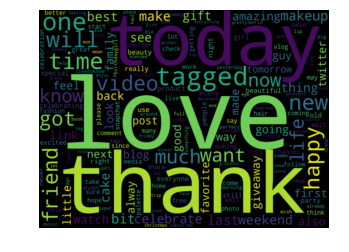

'TODO: look into LDA for topic modelling '

In [82]:
# get all the text.
# wordcloud2 = WordCloud().generate(' '.join(text2['Crime Type'])), which would concatenate all words in your dataframe column and then count all instances.

concatenated_text = ' '.join(posts['text'].astype(str)).lower()

cloud = WordCloud(width = 800, height = 600, min_font_size=8, collocations =False).generate(concatenated_text)

for key in list(cloud.words_.keys()): 
    if len(key) <= 2:
        del cloud.words_[key]
        
# throwing out other words like youtube, birthday, https etc.
del cloud.words_["birthday"]
del cloud.words_["https"]
del cloud.words_["youtu"]
del cloud.words_["facebook"]
del cloud.words_["youtube"]
del cloud.words_["instagram"]
del cloud.words_["pinterest"]
del cloud.words_["year"]
del cloud.words_["day"]
del cloud.words_["month"]
del cloud.words_["week"]
        
cloud2 = WordCloud(width = 1600, height = 1200, min_font_size=20).fit_words(cloud.words_)    

plt.imshow(cloud2, interpolation='bilinear')
plt.axis("off")
         
cloud2.to_file("cloud2.png")

plt.show()
"""TODO: remove words like youtube, https, twitter google etc. """

"""TODO: look into LDA for topic modelling """



In [81]:
#How many birthday mentions indicate an age? (i.e. “my 30th birthday”) 


texts = posts['text'].astype(str)

count = 0
my_x_bday_count = 0
turning_x_count = 0
for text in texts:
    text = text.lower()
    match = re.search("my ([a-zA-Z\d]+) birthday", text)
    if match:
        count += 1
        my_x_bday_count += 1
    elif re.search("turning ([a-zA-Z\d]+)", text):
        count += 1
        turning_x_count += 1
        
        
print("Number of posts that indicate age ")
print(count)
print("Number of posts with pattern my ([a-zA-Z\d]+) birthday")
print(my_x_bday_count)
print("Number of posts with pattern turning ([a-zA-Z\d]+)")
print(turning_x_count)

    
"""TODO: 
    actually use the capture group to predict the average age of these posts
    some posts use wording like 'my upcoming birthday" "my actual birthday" etc, use a better capture group
"""


Number of posts that indicate age 
1533
Number of posts with pattern my ([a-zA-Z\d]+) birthday
925
Number of posts with pattern turning ([a-zA-Z\d]+)
608


'TODO: \n    actually use the capture group to predict the average age of these posts\n    some posts use wording like \'my upcoming birthday" "my actual birthday" etc, use a better capture group\n'

In [19]:
a = ' '.join(posts['text'].astype(str))

In [8]:
# test zone
# find posts with in X days e.g.
# iterate thru list of users


unique_users = posts['user_id'].unique()

b = posts[posts['user_id']== unique_users[0]]['text']


def process_text(text, user_data):
    a = 5

def in_x_days(text, user_thing):

    for match in re.finditer('birthday in [a-zA-Z\d]+ days', text):
        user_thing.append(match.group(0))
    
    
# somesthing about users to in X days 

users_birthday = {};
    
for user in unique_users:
    users_birthday[user] = []
    user_row = posts[posts['user_id']== user]['text']
    for text in user_row:
#         process_text(text, users_birthday[user])
        in_x_days(text, users_birthday[user])
    if not users_birthday[user]:
        del users_birthday[user]


        
print(users_birthday)
        
    
# for user in unique_users:
#     posts[]
# posts['user_id' ]    
    # setup a dictionary if needbe
    # how to capture a section in between

#

{'81081722': ['birthday in 27 days'], '35859948': ['birthday in 4 days'], '21425482': ['birthday in 10 days'], '749515226': ['birthday in 4 days'], '383748949': ['birthday in 2 days'], '135977853': ['birthday in 4 days'], '1048447986': ['birthday in two days'], '101745805212': ['birthday in 2 days'], '2032468550': ['birthday in 14 days'], '2362734185': ['birthday in 5 days'], '376069472': ['birthday in 12 days'], '2267984659': ['birthday in three days'], '3303711539': ['birthday in 4 days'], '24042195': ['birthday in 2 days'], '79183155': ['birthday in 23 days'], '394635836': ['birthday in 6 days'], '222645578': ['birthday in 8 days'], '1513432386': ['birthday in 3 days'], '19462943': ['birthday in 2 days'], '20574145': ['birthday in 28 days'], '676997554': ['birthday in few days'], '211404613': ['birthday in 5 days'], '48702012': ['birthday in 3 days'], '1227536726': ['birthday in three days'], '3004207840': ['birthday in two days'], '15980786': ['birthday in 6 days'], '732264590': ['

In [87]:
# #If a user posts multiple posts, are they all clustered around a certain month or day?

# unique_users = posts['user_id'].unique()

# for user in unique_users:
#      = posts[posts['user_id'] == user]['publish_date']

        


# # aggregate users w/ multiple posts
# # check month/day of the posts? 
import os
print('hello')
os.system('cls')
print('world')





hello
world
